<div class="alert alert-primary" style="margin-top: 20px">


<h1><center><Strong>IMDB Sentiment Analysis</strong></center></h1>

</div>


<img algin="center" src="https://upload.wikimedia.org/wikipedia/commons/6/69/IMDB_Logo_2016.svg"/>

<div class="alert alert-primary" style="margin-top: 20px">

<strong><h2>Dataset Story:</h2></strong>
<blockquote><p>IMDB dataset having 50K movie reviews for natural language processing or Text analytics.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing. So, predict the number of positive and negative reviews using either classification or deep learning algorithms.</p>
</blockquote>
<ul>
    
</ul>
<strong><h2>Features:</h2></strong>
<ul>
<li>Total Features : 2</li>
<li>Total Row : 50000 </li>
<li>CSV File Size : 66.21 MB</li>

</ul>
</div>

 Sr. | Feature  | Description |
--- | --- | --- 
1 | Review | User comment about the movie
2 | Sentiment | The sentiment of the comment made about the movie {Positive / Negative }

---

### [For more dataset information](http://ai.stanford.edu/~amaas/data/sentiment/)    

 




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score
from bs4 import BeautifulSoup
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading Data
df_ = pd.read_csv('IMDB Dataset.csv')

In [3]:
df = df_.copy()

## Examining Data
---

In [4]:
def missing_values_analysis(df):
    na_columns_ = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns_].isnull().sum().sort_values(ascending=True)
    ratio_ = (df[na_columns_].isnull().sum() / df.shape[0] * 100).sort_values(ascending=True)
    missing_df = pd.concat([n_miss, np.round(ratio_, 2)], axis=1, keys=['Total Missing Values', 'Ratio'])
    missing_df = pd.DataFrame(missing_df)
    return missing_df

def check_df(df, head=5):
    print("--------------------- Shape --------------------")
    print(df.shape)
    print("-------------------- Types ---------------------")
    print(df.dtypes)
    print("----------------- NaN Analysis -----------------")
    print(missing_values_analysis(df))
    print("--------------------- Head ---------------------")
    print(df.head())

check_df(df)

--------------------- Shape --------------------
(50000, 2)
-------------------- Types ---------------------
review       object
sentiment    object
dtype: object
----------------- NaN Analysis -----------------
Empty DataFrame
Columns: [Total Missing Values, Ratio]
Index: []
--------------------- Head ---------------------
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


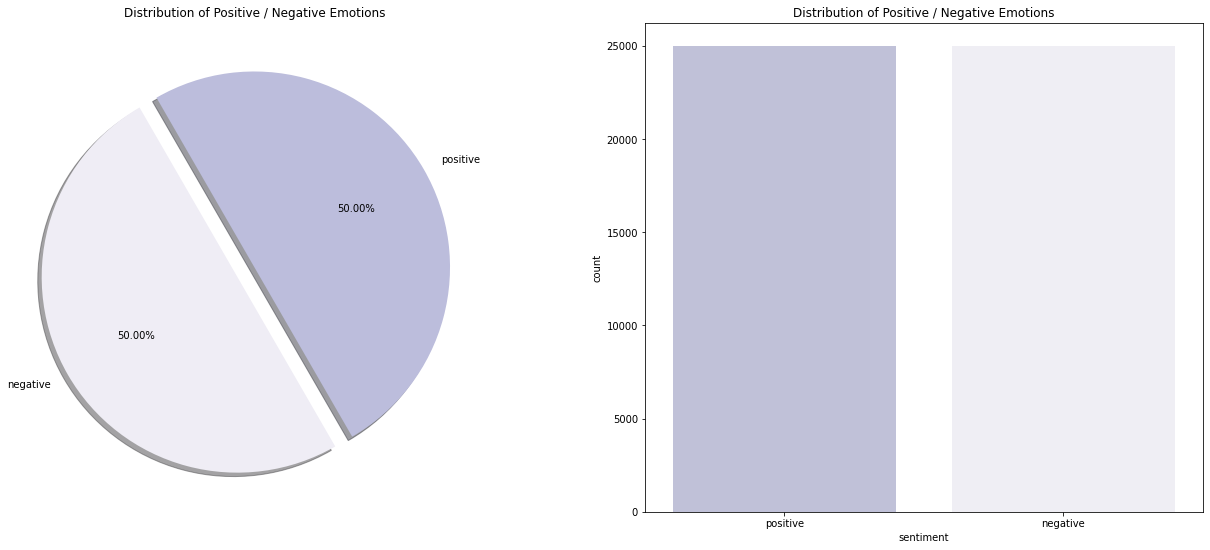

In [5]:
a , ax = plt.subplots(1,2,figsize=(22,9))
df['sentiment'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.2f%%',ax=ax[0],shadow=True, startangle=300, colors = ["#bcbddc", "#efedf5"])
ax[0].set_title('Distribution of Positive / Negative Emotions')
ax[0].set_ylabel('')
sns.countplot('sentiment', data = df ,ax=ax[1], palette=["#bcbddc", "#efedf5"])
ax[1].set_title('Distribution of Positive / Negative Emotions')
plt.show()

In [6]:
df.groupby(['sentiment'])[['sentiment']].count()

,sentiment
sentiment,
negative,25000
positive,25000


## Everything is going well...
----

<div class="alert alert-block alert-info">
        <b> 📌We didn't find any missing values and everything seems fine. The distribution of our data is good. There are 50,000 observation units in total (Emotional distribution: positive 50% / negative 50%) and 2 features. We can move on to the cleaning phase.</b>
</div>
<br>

In [7]:
# First, we will delete HTML tags from review sentences using the BeautifulSoup module, 

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:crimson;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
📌 To explain how these processes are done, first let's choose a single review and see how it is done for you:
</div>

In [8]:
example_review = df.review[0]
example_review

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [9]:
# After cleaning the HTML tags... 😌
example_review = BeautifulSoup(example_review).get_text()
example_review

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows wo

In [10]:
# we clean it from punctuation and numbers - using regex. {Regular expression}
example_review = re.sub("[^a-zA-Z]",' ',example_review)
example_review

'One of the other reviewers has mentioned that after watching just   Oz episode you ll be hooked  They are right  as this is exactly what happened with me The first thing that struck me about Oz was its brutality and unflinching scenes of violence  which set in right from the word GO  Trust me  this is not a show for the faint hearted or timid  This show pulls no punches with regards to drugs  sex or violence  Its is hardcore  in the classic use of the word It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary  It focuses mainly on Emerald City  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda  Em City is home to many  Aryans  Muslims  gangstas  Latinos  Christians  Italians  Irish and more    so scuffles  death stares  dodgy dealings and shady agreements are never far away I would say the main appeal of the show is due to the fact that it goes where other shows wo

## An important point! - 1
---

<div class="alert alert-block alert-info">
        <b> 📌I will now convert the text to all lowercase.
Our machine learning algorithms recognize words that start with a capital letter as different words, and we will convert them to lowercase. Thus, our machine learning algorithms will not perceive words that start with a capital letter as a different word.</b>
</div>
<br>

In [11]:
example_review = example_review.lower()
example_review

'one of the other reviewers has mentioned that after watching just   oz episode you ll be hooked  they are right  as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence  which set in right from the word go  trust me  this is not a show for the faint hearted or timid  this show pulls no punches with regards to drugs  sex or violence  its is hardcore  in the classic use of the word it is called oz as that is the nickname given to the oswald maximum security state penitentary  it focuses mainly on emerald city  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda  em city is home to many  aryans  muslims  gangstas  latinos  christians  italians  irish and more    so scuffles  death stares  dodgy dealings and shady agreements are never far away i would say the main appeal of the show is due to the fact that it goes where other shows wo

## An important point! - 2
---
<div class="alert alert-block alert-info">
        <b> 📌Stopwords (We want words like the, is, are not to be used by AI. These are grammar words..) That's why we're going to remove them. </b>
</div>
<br>

In [12]:
example_review = example_review.split()

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/koc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
words = set(stopwords.words("english")) # conversion into set for fast searching !!!
example_review = [word for word in example_review if word not in words]              
example_review

['one',
 'reviewers',
 'mentioned',
 'watching',
 'oz',
 'episode',
 'hooked',
 'right',
 'exactly',
 'happened',
 'first',
 'thing',
 'struck',
 'oz',
 'brutality',
 'unflinching',
 'scenes',
 'violence',
 'set',
 'right',
 'word',
 'go',
 'trust',
 'show',
 'faint',
 'hearted',
 'timid',
 'show',
 'pulls',
 'punches',
 'regards',
 'drugs',
 'sex',
 'violence',
 'hardcore',
 'classic',
 'use',
 'word',
 'called',
 'oz',
 'nickname',
 'given',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 'focuses',
 'mainly',
 'emerald',
 'city',
 'experimental',
 'section',
 'prison',
 'cells',
 'glass',
 'fronts',
 'face',
 'inwards',
 'privacy',
 'high',
 'agenda',
 'em',
 'city',
 'home',
 'many',
 'aryans',
 'muslims',
 'gangstas',
 'latinos',
 'christians',
 'italians',
 'irish',
 'scuffles',
 'death',
 'stares',
 'dodgy',
 'dealings',
 'shady',
 'agreements',
 'never',
 'far',
 'away',
 'would',
 'say',
 'main',
 'appeal',
 'show',
 'due',
 'fact',
 'goes',
 'shows',
 'dare',
 

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:blue;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
    <p> 🦅 Perfect if you understand this cleaning process (through the example.) ✌🏻🦾</p>
</div>

## Now let's apply this cleanup to the entire dataframe
---

In [15]:
def process(review):
    # review without HTML tags
    review = BeautifulSoup(review).get_text()
    # review without punctuation and numbers
    review = re.sub("[^a-zA-Z]",' ',review)
    # converting into lowercase and splitting to eliminate stopwords
    review = review.lower()
    review = review.split()
    # review without stopwords
    swords = set(stopwords.words("english"))  # conversion into set for fast searching
    review = [w for w in review if w not in swords]               
    # splitted paragraph'ları space ile birleştiriyoruz return
    return(" ".join(review))

In [16]:
# We can see the status of the review process by printing a line after every 2500 reviews.

train_data = []
for i in range(len(df["review"])):        
    if (i+1)%2500 == 0:        
        print("Result =", i+1)
    train_data.append(process(df["review"][i]))

Result = 2500
Result = 5000
Result = 7500
Result = 10000
Result = 12500
Result = 15000
Result = 17500
Result = 20000
Result = 22500
Result = 25000
Result = 27500
Result = 30000
Result = 32500
Result = 35000
Result = 37500
Result = 40000
Result = 42500
Result = 45000
Result = 47500
Result = 50000


## Split : Train Path / Test Path 
---

In [17]:
independent = train_data
dependent = np.array(df["sentiment"])

train_x, test_x, y_train, y_test = train_test_split(independent,dependent, stratify = dependent ,test_size = 0.2, shuffle = True , random_state = 25)


### We are creating Bag of Words!
---
<div class="alert alert-block alert-info">
        <b> 📌We have cleaned our data, but for the artificial intelligence to work, it is necessary to convert this text-based data into numbers and a matrix called bag of words. Here we use the CountVectorizer tool in sklearn for this purpose 💁🏻</b>
</div>
<br>

<img src="https://teknofesor.com/wp-content/uploads/2020/01/bag-of-words-nedir.png" width="900" height="900" >

In [18]:
# # Using the countvectorizer function in sklearn, we create a bag of words with a maximum of 10.000 words...
vectorizer = CountVectorizer( max_features = 10000 )

# we convert our train data to feature vector matrix
train_x = vectorizer.fit_transform(train_x)

In [19]:
vectorizer

CountVectorizer(max_features=10000)

In [20]:
train_x

<40000x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 3439178 stored elements in Compressed Sparse Row format>

In [21]:
# Since our machine learning algorithm requires an array for the training process, we convert it to an array.
train_x = train_x.toarray()
train_y = y_train

In [22]:
print("Total training data :", train_x.shape[0])
print("Total training data :", train_y.shape[0])

Total training data : 40000
Total training data : 40000


# Model evaluation

In [23]:
models = []

models.append(('Logistic Regression',LogisticRegression()))
models.append(('Random Forest Classifier',RandomForestClassifier()))
models.append(('Decision Tree Classifier',DecisionTreeClassifier()))

In [24]:
# We convert our test data to vector matrix feature
#This time for our test:
test_result = vectorizer.transform(test_x)


In [25]:
test_result = test_result.toarray()

In [26]:
test_result.shape

(10000, 10000)

In [27]:
for name, model in models:

    %time model.fit(train_x, train_y)
    test_pred = model.predict(test_result)
    print(name ,'Accuracy Score : ',accuracy_score(y_test, test_pred))
    print(name ,'F1 Score : ',f1_score(y_test, test_pred, average='weighted'))
    print('-----------------------------------------------------------------------')

CPU times: user 6min 40s, sys: 12.4 s, total: 6min 52s
Wall time: 56.3 s
Logistic Regression Accuracy Score :  0.8758
Logistic Regression F1 Score :  0.8757931984355463
-----------------------------------------------------------------------
CPU times: user 4min 25s, sys: 4.9 s, total: 4min 30s
Wall time: 4min 34s
Random Forest Classifier Accuracy Score :  0.8467
Random Forest Classifier F1 Score :  0.8466996550742238
-----------------------------------------------------------------------
CPU times: user 6min 34s, sys: 6.81 s, total: 6min 40s
Wall time: 6min 47s
Decision Tree Classifier Accuracy Score :  0.7203
Decision Tree Classifier F1 Score :  0.720284265989962
-----------------------------------------------------------------------
